<a href="https://colab.research.google.com/github/MiguelAngeloTr/BIGDATA/blob/main/C2/RegresionIA_BigData_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pandas.core.dtypes.api import is_numeric_dtype, is_string_dtype
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
datos = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv')
datos.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#Informacion Faltante y Columnas innecesarias


In [ ]:
datos = datos.drop(['Unnamed: 0'], axis=1)
datos.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
total = datos.isnull().sum().sort_values(ascending=False)
percent_1 = datos.isnull().sum()/datos.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(datos.size)

,Total,%
TV,0,0.0
Radio,0,0.0
Newspaper,0,0.0
Sales,0,0.0


# Analisis Exploratorio de Datos (EDA)

In [ ]:
datos.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Una forma de establecer variables de utilidad es a través de las matrices de correlación. De este modo con respecto a la salida (Sales), evidenciar que variables presentan el valor absoluto del coeficiente mas alto.

<Axes: >

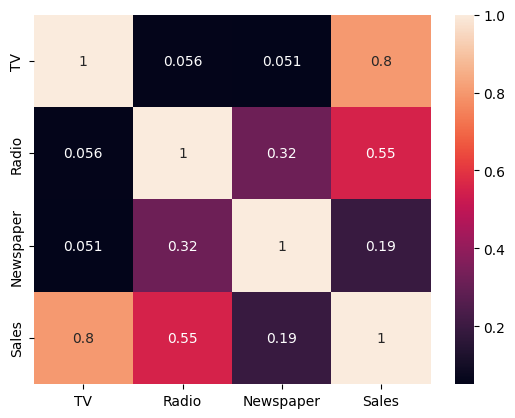

In [ ]:
sns.heatmap(datos.corr('spearman'),annot=True)

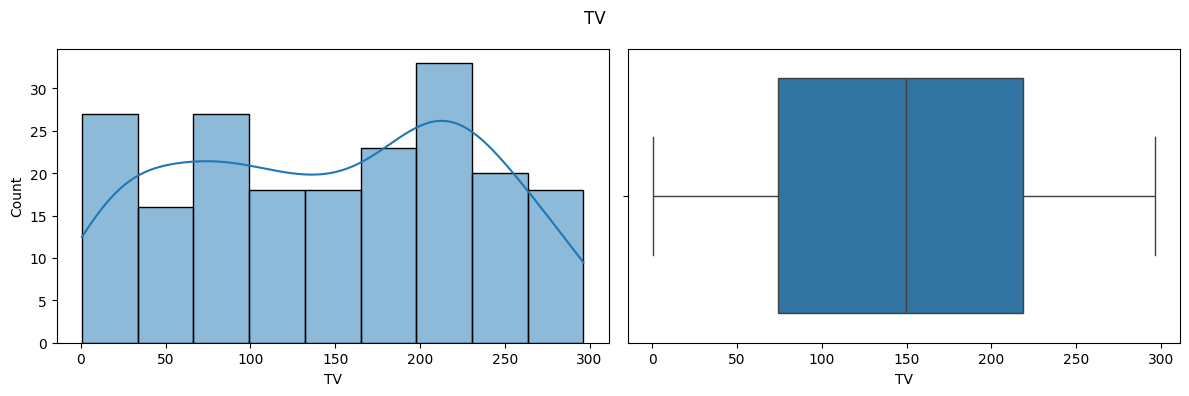

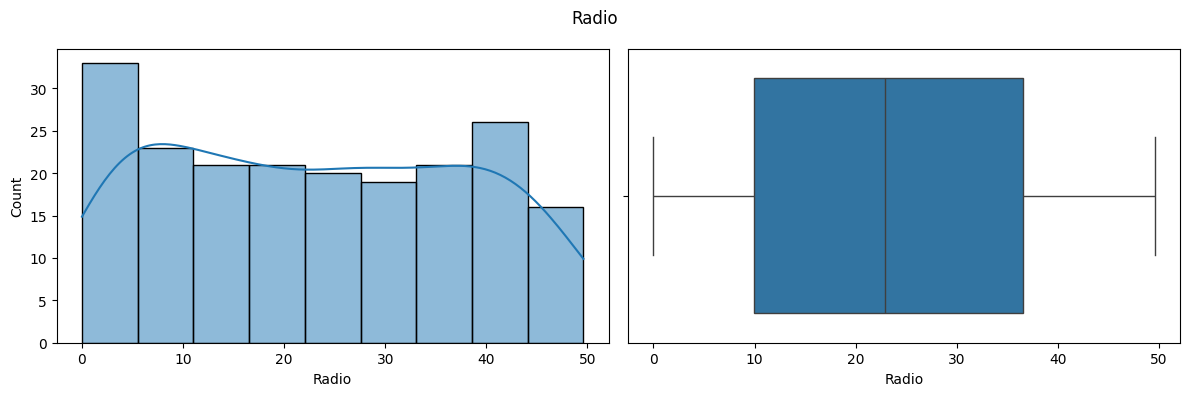

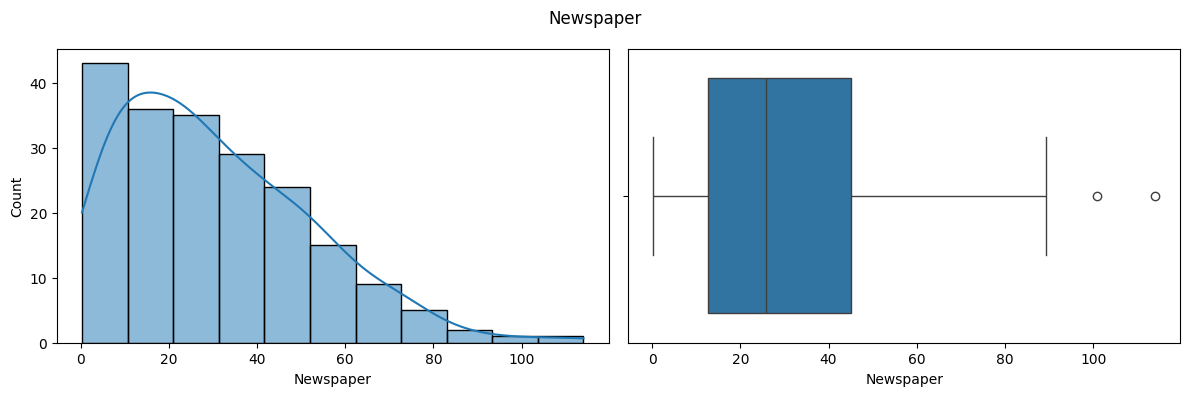

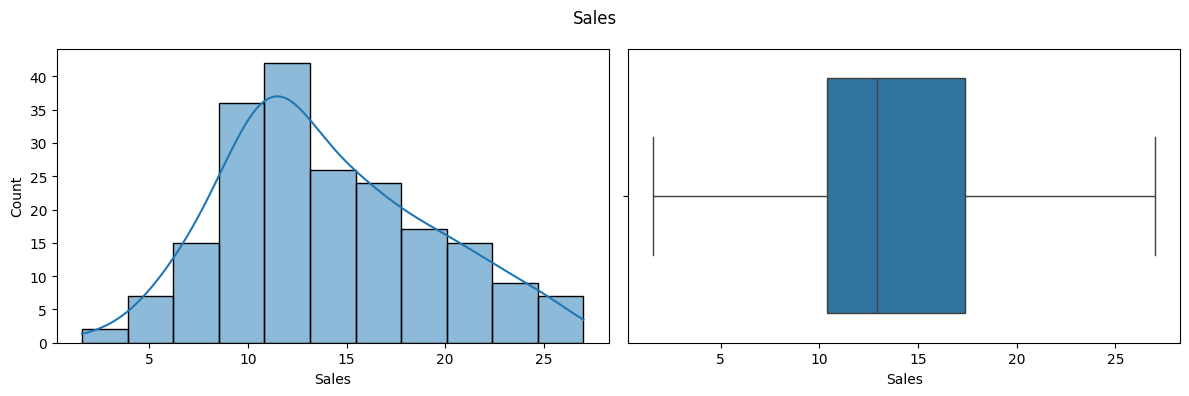

In [ ]:
num_list = []
cat_list = []
for column in datos:
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
  fig.suptitle(column)
  if is_numeric_dtype(datos[column]):
    sns.histplot(datos[column],kde=True,ax=ax1)
    sns.boxplot(x=datos[column],ax=ax2)
    num_list.append(column)
  elif is_string_dtype(datos[column]):
    sns.countplot(data=datos, x=datos[column], ax=ax1)
    cat_list.append(column)
  plt.tight_layout()

# Construcción del Regresor

In [ ]:
y = datos['Sales']
#X = np.c_[datos['TV']]
X = np.c_[datos['TV'], datos['Radio']]
X.shape, y.shape

((200, 2), (200,))

## Normalización o estandarización de variables

Este proceso será necesario cuando los rangos entre las variables excedan las 3 cifras. Es decir, una variable en numeros de 0 a 10 y otra de 0 a 1000.

A pesar de mejorar el rendimiento en algunas ocasiones, se pierde la interpretabilidad del modelo

In [ ]:
#scaler = MinMaxScaler((-1,1))
#scaler = StandardScaler()
X_scaled = np.c_[np.ones_like(y), X]
#X_scaled = np.c_[np.ones_like(y), scaler.fit_transform(X)]

## División de conjuntos de ajuste (entrenamiento) y prueba

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=20)
x_train.shape, x_test.shape

((160, 3), (40, 3))

# Construcción y Ajuste del modelo de regresión

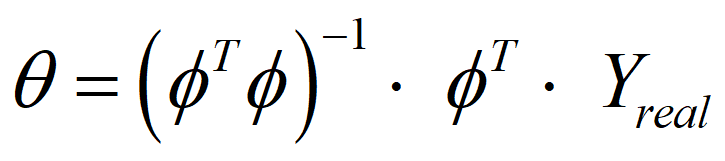

In [ ]:
theta = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train
theta

array([3.13770947, 0.04424213, 0.18965134])

## Modelo Ajustado:
$\hat{Sales} =  \hat{\theta}_0 +  \hat{\theta}_1 \cdot TV + \hat{\theta}_2 \cdot Radio $

$\hat{Sales} =  3.138 +  0.044 \cdot TV + 0.190 \cdot Radio $


## Interpretación del modelo
Los principales elementos que hay que interpretar en un modelo de regresión lineal son los coeficientes de los predictores:

* $\theta_0$ es la ordenada en el origen o intercept, se corresponde con el valor esperado de la variable respuesta 𝑦 cuando todos los predictores son cero.

* $\theta_j$ los coeficientes de regresión parcial de cada predictor indican el cambio promedio esperado de la variable respuesta  𝑦 al incrementar en una unidad de la variable predictora  $x_j$, manteniéndose constantes el resto de variables.


#**Ejercicio:** Interpretar la estimación de los parámetros del ejemplo anterior de acuerdo al contexto del problema

# Validación

In [ ]:
y_gorro_test = x_test @ theta
y_gorro_train = x_train @ theta
y_gorro_test.shape, y_test.shape

((40,), (40,))

## Métricas de Rendimiento

### Entrenamiento

In [ ]:
MSE = mean_squared_error(y_train,y_gorro_train)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_train,y_gorro_train)
R2 = r2_score(y_train,y_gorro_train)

In [ ]:
print(f"MSE: {MSE:.4f}")
print(f"RMSE: {RMSE:.4f}")
print(f"MAE: {MAE:.4f}")
print(f"R2: {R2*100:.2f}%")

MSE: 2.6327
RMSE: 1.6226
MAE: 1.2039
R2: 89.39%


### Prueba

In [ ]:
MSE = mean_squared_error(y_test,y_gorro_test)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test,y_gorro_test)
R2 = r2_score(y_test,y_gorro_test)

In [ ]:
print(f"MSE: {MSE:.4f}")
print(f"RMSE: {RMSE:.4f}")
print(f"MAE: {MAE:.4f}")
print(f"R2: {R2*100:.2f}%")

MSE: 3.4827
RMSE: 1.8662
MAE: 1.4046
R2: 90.38%


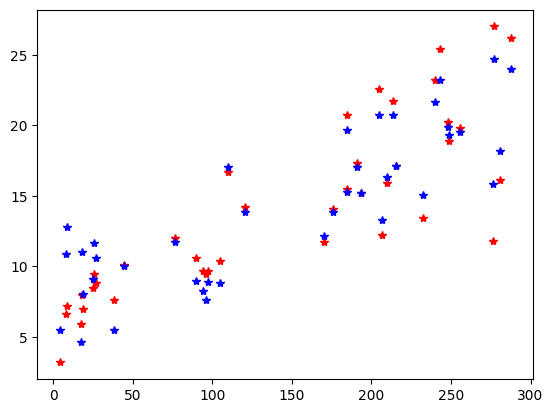

In [ ]:
plt.plot(x_test[:,1],y_test,'*r')
plt.plot(x_test[:,1],y_gorro_test,'*b')
plt.show()

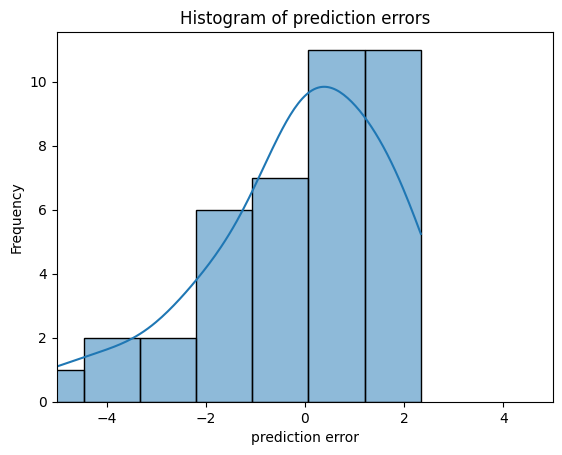

In [ ]:
diff = y_test - y_gorro_test
sns.histplot(diff,kde=True)
plt.title('Histogram of prediction errors')
plt.xlim(-5,5)
plt.xlabel('prediction error')
plt.ylabel('Frequency')
plt.show()